In [78]:
import copy
import os
import numpy as np
import csv
import numpy as np
import argparse

import json
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
from matplotlib import ticker
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

from set_analyze.my_diff_color import *

from cache_sensitive_names import *

cache_type = 'goldencove'

select_json = f'/nfs/home/zhangchuanqi/lvna/5g/lazycat-data_proc/set_analyze/conf-json/conf_{cache_type}_tailbm50M.json'

with open(select_json,'r') as f:
        use_conf = json.load(f)

test_prefix = use_conf['test_prefix']
# perf_prefix = '95perf'
pic_dir_path = f'{test_prefix}pics'

work0names = use_conf['cache_work_names']


print(work0names)


parameters = {'axes.labelsize': 25,
        'axes.titlesize': 30,
        'xtick.labelsize': 28,
        'ytick.labelsize': 24,
        'legend.fontsize': 28,
        'font.size': 45,
        'lines.linewidth': 3,
        }
plt.rcParams.update(parameters)
fig_inchs = (20,5.5)

['cam4', 'fotonik3d', 'lbm', 'omnetpp', 'parest', 'roms', 'xalancbmk', 'cc_sv', 'pr_spmv', 'tc', 'imgdnn', 'sphinx', 'xapian']


[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
0.2


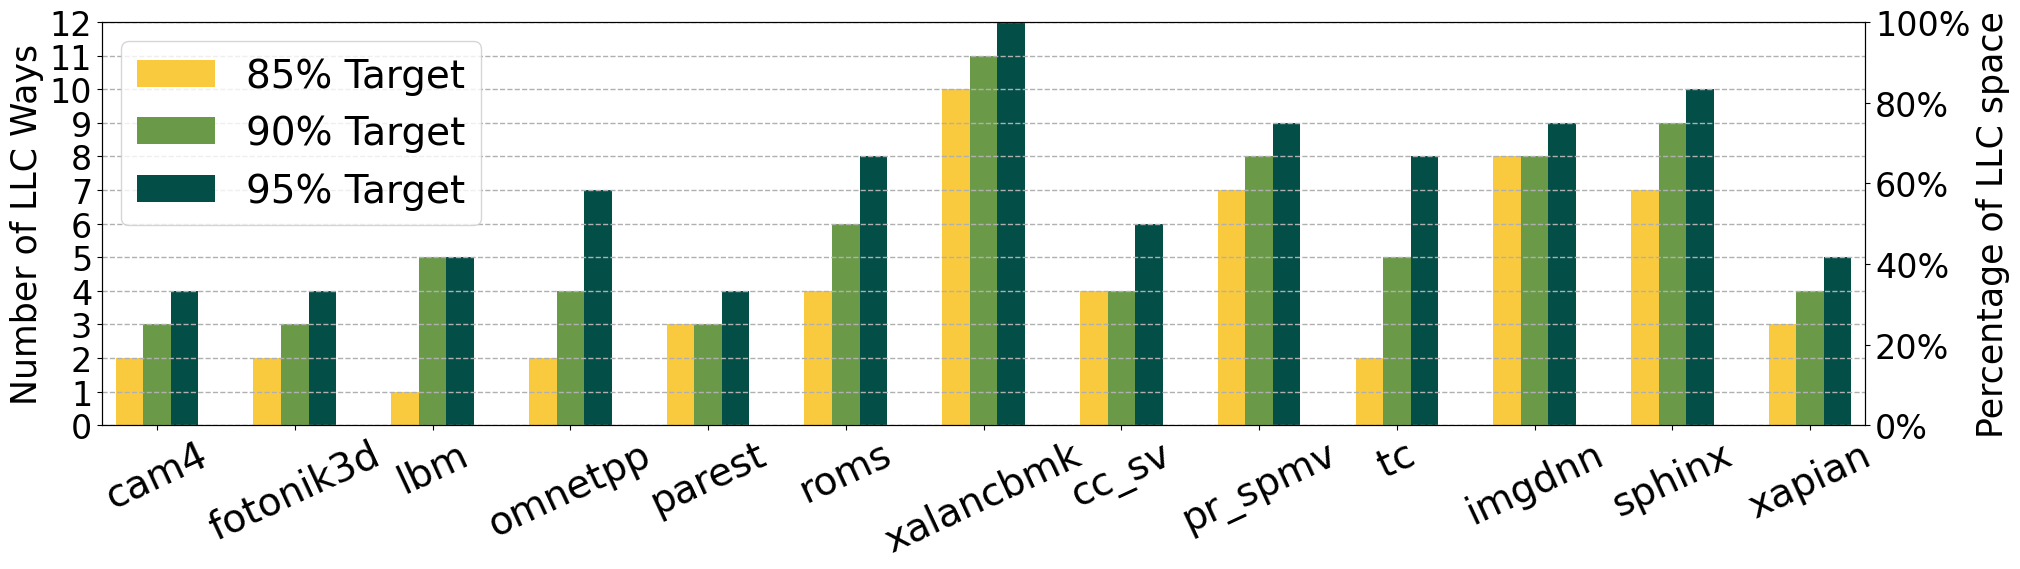

In [79]:
perf_target = ['85','90','95']
key_format = 'cache_work_full{}perfways'
perf_ways_list_dict = {}

for p in perf_target:
    way_dict = use_conf[ key_format.format(p) ]
    perf_ways_list_dict[p] = [way_dict[w] for w in work0names]

width = 0.2
w0xlabels = work0names
box_step = len(perf_target)
x = np.arange(len(w0xlabels))
print(x)

# colors = [leaf_yellow[i] for i in range(0, len(leaf_yellow),2)]
# colors.reverse()
colors = [leaf_yellow[i] for i in range(2, len(leaf_yellow),3)]
# colors.reverse()

fig, ax = plt.subplots()
for i,p in enumerate(perf_target):
    bs = ax.bar(x+i*width, perf_ways_list_dict[p], width, label=f'{p}% Target', color=colors[i])


# set vlines to separate different workloads
# for i in range(1, len(w0xlabels)):
#     ax.axvline(x=box_step*i+0.5, color='gray',linewidth=3, linestyle='--')

# set xlabels
# xlabel0_val = np.average(np.arange(1, box_step+1))
xlabel0_val = (box_step -1) * width / 2
print(xlabel0_val)
ax.set_xticks([x+xlabel0_val for x in range(0, len(w0xlabels))])
ax.set_xticklabels(w0xlabels)
ax.set_xlim(-width, len(w0xlabels)-width*(box_step-1))
# ax.grid(axis='y', linestyle='-', linewidth=1)
ax.grid(axis='y', linestyle='--', linewidth=1)

# plt.setp(ax.get_xticklabels(), rotation=10, ha="center",
#         # rotation_mode="anchor")
#         rotation_mode="default")
plt.setp(ax.get_xticklabels(), rotation=25, ha="center",
        # rotation_mode="anchor")
        rotation_mode="default")

# ax.set_yticks(MultipleLocator)
ax.set_ylim(0, 12)
# ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
ax.set_ylabel('Number of LLC Ways')
plt.legend()

ax2 = ax.twinx()
ax2.set_ylim(0, 1)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.20))
ax2.set_ylabel('Percentage of LLC space')

# set legend
# legends = [Patch(color=colors[i%box_step],label=f'{bucket_list[i]}')
#             for i in range(0, box_step) ]
# legends = [ Line2D([0], [0], color=colors[0], lw=2, label='16 Buckets'),
#             Line2D([0], [0], color=colors[1], lw=2, label='32 Buckets'),
#             Line2D([0], [0], color=colors[2], lw=2, label='64 Buckets')]
# plt.legend(handles = legends,loc = 'upper center')
# plt.legend(ax.patches, [f'{p}% Target' for p in perf_target], loc='upper center', ncol=3)
# plt.title(exps[0])
fig.set_size_inches(fig_inchs)
fig.tight_layout(pad=0)
# plt.show()
# plt.subplots_adjust(top=1, bottom=0, left=0, right=1)
plt.savefig(f'{pic_dir_path}/asplos23_boxplot_ways_profiling.png', dpi=300)
